<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png" 
     width="200px"
     height="auto"/>
</p>

# Reddit and HuggingFace Starter Kit

## Part I: [Reddit API](https://www.reddit.com/dev/api/)
The first part of this excercise is to figure out how to instantiate a Reddit API object using the Python Reddit API Wrapper [PRAW](https://praw.readthedocs.io/en/stable/).  PRAW is a Python library that provides a simple interfaceto interact with the Reddit API.

### Your Task
You will first need to instantiate a [Reddit instance](https://praw.readthedocs.io/en/stable/code_overview/reddit_instance.html).
Hint: you only need to use `client_id`, `client_secret`, and `user_agent`

#### Make sure everyone in the group does this part! 

Follow the guide below on how to get your `client_id` and `client_secret`.

#### Follow these steps:
1. Pull the `FourthBrain/ML03` repo locally so you can start development.
2. Open `reddit_and_huggingface.ipynb` and install the necessary packages for this lesson by running:

    ```
    cd code_student/Week_2
    conda activate {your_virtual_environment_name}
    pip install transformers praw torch torchvision torchaudio
    ```
    
3. Obtain your `client_id` and `client_secret`

* Make a Reddit account
* Follow the steps in this screenshot which are the first steps from this [guide](https://towardsdatascience.com/how-to-use-the-reddit-api-in-python-5e05ddfd1e5c).

![instructions to set up reddit api](../../images/reddit_get_access.JPG)

* Create a `secrets.py` file and include the following:

    ```
    REDDIT_API_CLIENT_ID = ""
    REDDIT_API_CLIENT_SECRET = ""
    REDDIT_API_USER_AGENT = {can_be_any_string...for ex: "teslabot"}
    ```
    Get it?  [Teslabot :)](https://www.tesla.com/AIhttps://www.tesla.com/AI)
    

* Put `secrets.py` in `Week_2` so you can easily import it

4. Complete the code in the `# YOUR CODE HERE` space below that creates a reddit instance object that allows us to interact with the Reddit API.  Note that the `subreddit` object for the 'r/TSLA' subreddit has already been created for you.

In [1]:
#loading env variable with praw credentials https://praw.readthedocs.io/en/stable/getting_started/configuration/environment_variables.html
%load_ext dotenv
%dotenv

In [3]:
import praw
from transformers import pipeline
import secrets

reddit = praw.Reddit()
print(reddit.read_only)
subreddit_tesla = reddit.subreddit('TSLA')

True


## Part II:  [r/TSLA Subreddit](https://www.reddit.com/r/TSLA/)
The second part of this exercise is to figure out how to the following code is parsing comments through use of the r/TSLA `subreddit` instance object.

### Your Task
1. Work with your group to comment each line of the following code so that you describe what each piece is doing.
2. Create one comment at the top of the code that describes what the larger for loop is iterating over.  
3. (Optional) How many comments will I get from this?

A few resources that might help!
* How do I find the top 10 posts of all time from your favorite subreddit(s)? (hint: look at ["Obtain Submission Instances from a Subreddit"](https://praw.readthedocs.io/en/stable/getting_started/quick_start.html))
* How do I parse comments from the post? (hint: look at ["Obtain Submission Instances from a Subreddit"](https://praw.readthedocs.io/en/stable/getting_started/quick_start.html))

In [4]:
from praw.models import MoreComments

#list to store hot comments
hot_comments = []
# I change top method by hot method to get the hottest comments
for submission in subreddit_tesla.hot(limit=10): # I am iterating over the 10 hottest post
    for top_level_comment in submission.comments:
        if isinstance(top_level_comment, MoreComments):
            continue
        hot_comments.append(top_level_comment.body) # addind the comments to the list

#list to get the most recent comments
new_comments = []
# I change top method by new method to get the more recent comments
for submission in subreddit_tesla.new(limit=10):
    for top_level_comment in submission.comments:
        if isinstance(top_level_comment, MoreComments):
            continue
        new_comments.append(top_level_comment.body)

total_comments = hot_comments + new_comments # adding the two list

In [5]:
print("Total comments obtained: ", len(total_comments))

Total comments obtained:  54


## Part III:  [HuggingFace](https://huggingface.co/docs/transformers/quicktour)
The third part of this exercise is to analyze the sentiment of each comment scraped from `r/TSLA` to using a pre-trained HuggingFace model to make the inference. 

### Your Task
1. Implement the [Sentiment Analysis](https://huggingface.co/docs/transformers/quicktour) Model in the `# YOUR CODE HERE` section. 
2. (Optional) What is the net sentiment of the entire list of comments?

In [6]:
from transformers import pipeline
import pandas as pd
sentiment_model = pipeline("sentiment-analysis")
results = sentiment_model(total_comments)
dict_results = {'labels': [] , 'scores': []}
labels = []
scores = []

for result in results:
    labels.append(result['label'])
    scores.append((result['score']))
dict_results['labels'] = labels
dict_results['scores'] = scores
# just to explore the result nicely
df = pd.DataFrame(dict_results)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


In [10]:
df_pivoted = df.pivot_table(values='scores', index=df.index, columns='labels', aggfunc='first')
df_pivoted.describe()

labels,NEGATIVE,POSITIVE
count,33.000000,21.000000
mean,0.956126,0.983919
std,0.098257,0.017012
min,0.533891,0.949722
25%,0.964937,0.970316
50%,0.994717,0.989782
75%,0.998461,0.998947
max,0.999411,0.999730


<AxesSubplot:xlabel='labels', ylabel='scores'>

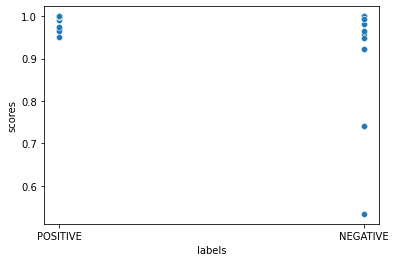

In [11]:
import seaborn as sns
sns.scatterplot(data=df, x="labels", y="scores")

In [16]:
import random
def get_random_comment(conversations):
    comment = random.choice(conversations)
    return comment

# Run sentiment analysis
sentiment_query_sentence = get_random_comment(total_comments) # grabs a random comment from the comment and replies list
sentiment = sentiment_model(sentiment_query_sentence) # 
print(f"Sentiment test: {sentiment_query_sentence} === {sentiment}")

Sentiment test: Don’t forget us in the Solar field!!!!! 

Jokes aside, love being apart of & seeing the growth of this company!! === [{'label': 'POSITIVE', 'score': 0.9997304081916809}]
